<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/Exercise_Fuzzy_AI_Adaptive_Neural_Fuzzy_20146195_Doan_Nguyen_Hoang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=19af157969fa050bf97a06a299725c9c25512c24cc18c9381193969a7701cbe1
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-2-5ead499ed36c>:72: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
<ipython-input-2-5ead499ed36c>:73: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
<ipython-input-2-5ead499ed36c>:74: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)


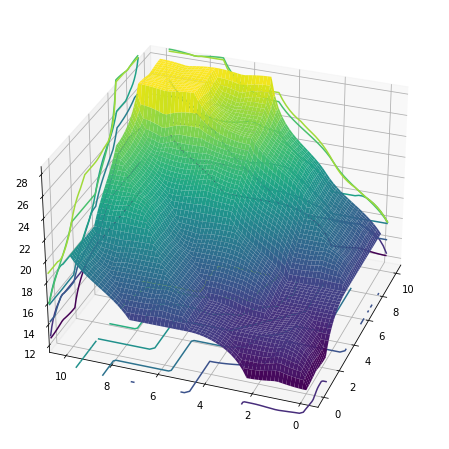

In [ ]:
from networkx.algorithms.bipartite import projection
from numpy.core.numeric import zeros_like
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 


universe = np.linspace(0,10,61) #Chia đều ra gồm 61 phần tử
universe1 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'food')
service = ctrl.Antecedent(universe,'service')
tip = ctrl.Consequent(universe1,'tip')

# Vẽ Membership tự động
input_data = ['Very_Poor','Poor','Average','Good','Very_Good']
output_data = ['Very_Less','Less','Normal','Much','Very_Much']

food.automf(names = input_data)
service.automf(names = input_data)
tip.automf(names = output_data)

rule0 = ctrl.Rule(antecedent=((food['Very_Poor']&service['Very_Poor'])|(food['Very_Poor']&service['Poor'])
                              |(food['Poor']&service['Very_Poor'])|(food['Poor']&service['Poor']))
                              ,consequent=tip['Very_Less'],label = 'ruleVL')

rule1 = ctrl.Rule(antecedent=((food['Very_Poor']&service['Average'])|(food['Very_Poor']&service['Good'])
                              |(food['Poor']&service['Poor'])|(food['Poor']&service['Average'])
                              |(food['Average']&service['Very_Poor'])|(food['Average']&service['Poor'])
                              |(food['Good']&service['Very_Poor'])|(food['Very_Good']&service['Very_Poor']))
                              ,consequent=tip['Less'],label = 'ruleL')

rule2 = ctrl.Rule(antecedent=((food['Very_Poor']&service['Very_Good'])|(food['Poor']&service['Good'])
                              |(food['Poor']&service['Very_Good'])|(food['Average']&service['Average'])
                              |(food['Average']&service['Good'])|(food['Good']&service['Poor'])
                              |(food['Very_Good']&service['Poor']))
                              ,consequent=tip['Normal'],label = 'ruleN')

rule3 = ctrl.Rule(antecedent=((food['Average']&service['Very_Good'])|(food['Good']&service['Average']))
                              ,consequent=tip['Much'],label = 'ruleM')

rule4 = ctrl.Rule(antecedent=((food['Good']&service['Good'])|(food['Good']&service['Very_Good'])
                              |(food['Very_Good']&service['Average'])|(food['Very_Good']&service['Good'])
                              |(food['Very_Good']&service['Very_Good']))
                              ,consequent=tip['Very_Much'],label = 'ruleVM')


system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=61*61+1)

upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z = zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
#Vẽ ra bề mặt điều khiển
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

#Vẽ 3 hình chiếu lên trên mặt phẳng bề mặt điều khiển
cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)

ax.view_init(30,200)

# Hiển Thị Kết Quả
#food.view()
#service.view()
#tip.view()


<ipython-input-21-e9f1914c1698>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
<ipython-input-21-e9f1914c1698>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
<ipython-input-21-e9f1914c1698>:79: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)


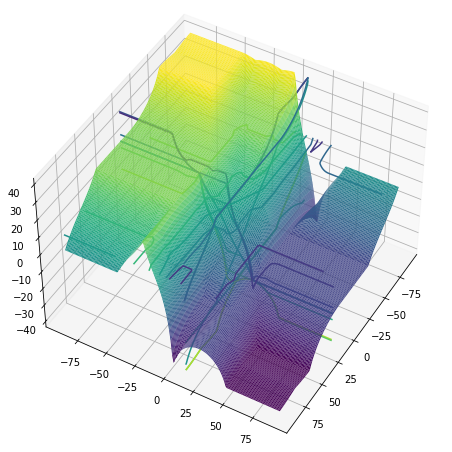

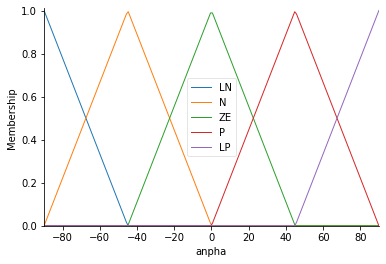

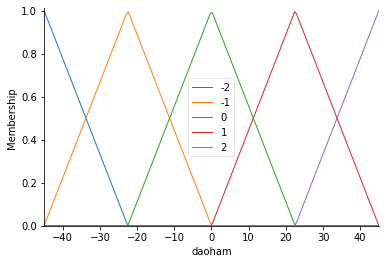

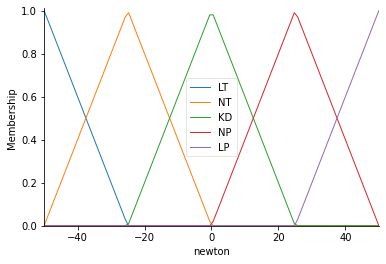

In [ ]:
# Con Lắc Ngược

from networkx.algorithms.bipartite import projection
from numpy.core.numeric import zeros_like
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

#Quy ước bên trái là - bên phải là +
data_anpha = np.linspace(-90,90,180) 
data_daoham = np.linspace(-45,45,180)
luc = np.linspace(-50,50,100)

anpha = ctrl.Antecedent(data_anpha,'anpha') 
daoham = ctrl.Antecedent(data_daoham,'daoham') 

newton = ctrl.Consequent(luc,'newton')

# Vẽ Membership tự động
input_data1 = ['LN','N','ZE','P','LP']
input_data2 = ['-2','-1','0','1','2']
output_data = ['LT','NT','KD','NP','LP']

anpha.automf(names = input_data1)
daoham.automf(names = input_data2)

newton.automf(names = output_data)

#Rule
rule0 = ctrl.Rule(antecedent=((anpha['LN']&daoham['-2'])|(anpha['N']&daoham['-2'])
                              |(anpha['LN']&daoham['-1'])|(anpha['LN']&daoham['0']))
                              ,consequent=newton['LP'],label = 'tacdonglucLonTuPhaiQua')

rule1 = ctrl.Rule(antecedent=((anpha['ZE']&daoham['-2'])|(anpha['P']&daoham['-2'])
                              |(anpha['N']&daoham['-1'])|(anpha['ZE']&daoham['-1'])
                              |(anpha['P']&daoham['-1'])|(anpha['LP']&daoham['-1'])
                              |(anpha['N']&daoham['0']))
                              ,consequent=newton['NP'],label = 'tacdonglucNhoTuPhaiQua')

rule2 = ctrl.Rule(antecedent=((anpha['P']&daoham['0'])|(anpha['N']&daoham['1'])
                              |(anpha['ZE']&daoham['1'])|(anpha['P']&daoham['1'])
                              |(anpha['LP']&daoham['1'])|(anpha['N']&daoham['2'])
                              |(anpha['ZE']&daoham['2']))
                              ,consequent=newton['NT'],label = 'tacdonglucNhoTuTraiQua')

rule3 = ctrl.Rule(antecedent=((anpha['LP']&daoham['-2'])|(anpha['ZE']&daoham['0'])|(anpha['LN']&daoham['2']))
                              ,consequent=newton['KD'],label = 'KhongTacDung')

rule4 = ctrl.Rule(antecedent=((anpha['LP']&daoham['0'])|(anpha['LN']&daoham['1'])
                              |(anpha['P']&daoham['2'])|(anpha['LP']&daoham['2']))
                              ,consequent=newton['LT'],label = 'tacdonglucLonTuTraiQua')

system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=180*180+1)

upsampled = np.linspace(-90,90,180)
x,y = np.meshgrid(upsampled,upsampled)
z = zeros_like(x)

for i in range(180):
  for j in range(180):
    sim.input['anpha'] = x[i,j]
    sim.input['daoham'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['newton']


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
#Vẽ ra bề mặt điều khiển
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

#Vẽ 3 hình chiếu lên trên mặt phẳng bề mặt điều khiển
cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)

ax.view_init(45,30)

#Hiển Thị Kết Quả
anpha.view()
daoham.view()
newton.view()




<ipython-input-28-582d48e89bef>:111: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(x,y,z,zdir='m',offset =9,cmap='viridis',anpha=0.5)
<ipython-input-28-582d48e89bef>:111: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='m',offset =9,cmap='viridis',anpha=0.5)
<ipython-input-28-582d48e89bef>:112: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
<ipython-input-28-582d48e89bef>:113: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)


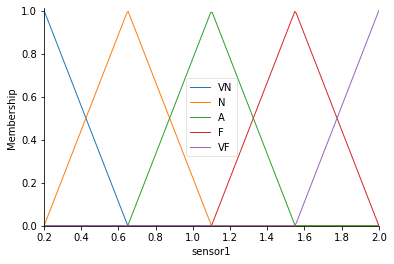

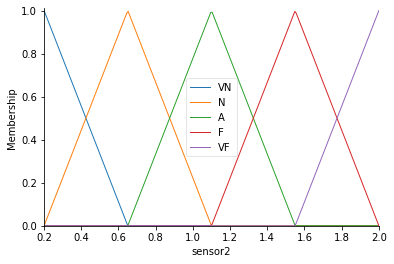

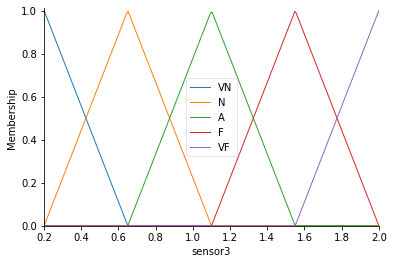

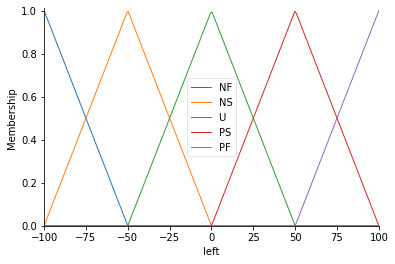

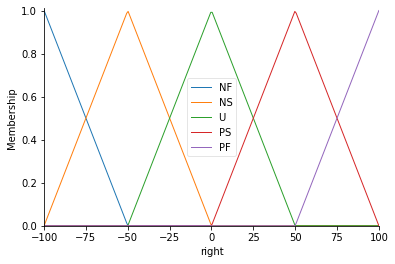

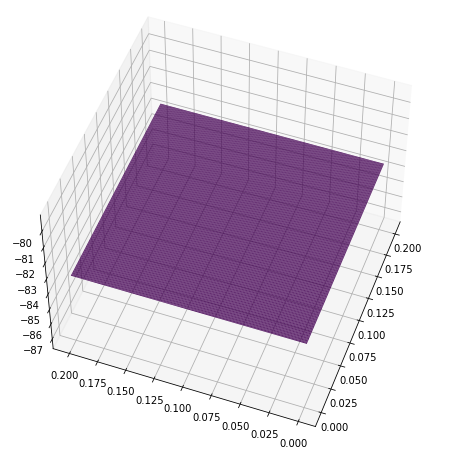

In [ ]:
# Robot Mobile có 2 bánh xe 

from networkx.algorithms.bipartite import projection
from numpy.core.numeric import zeros_like
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

data_sensor = np.linspace(0.2,2,240) #Chia đều ra gồm 61 phần tử 0.2 đến 2m là khoảng cách sensor phát thấy tín hiệu
data_velocity = np.linspace(-100,100,240) #Vận tốc từ -100 đến 100

sensor1 = ctrl.Antecedent(data_sensor,'sensor1') #Phía trước robot
sensor2 = ctrl.Antecedent(data_sensor,'sensor2') #Bên trái robot
sensor3 = ctrl.Antecedent(data_sensor,'sensor3') #Bên phải robot

left = ctrl.Consequent(data_velocity,'left')
right = ctrl.Consequent(data_velocity,'right')

# Vẽ Membership tự động
input_data = ['VN','N','A','F','VF'] #Very_Near - Near - Average - Far - Very Far
output_data = ['NF','NS','U','PS','PF'] #Negative_Fast - Negative_Slow - Unchanged - Positive_Slow - Positive_Fast

sensor1.automf(names = input_data)
sensor2.automf(names = input_data)
sensor3.automf(names = input_data)

left.automf(names = output_data)
right.automf(names = output_data)

#Xây dựng luật
rule0 = ctrl.Rule(antecedent=((sensor1['VN']&sensor2['VN']&sensor3['VN'])|(sensor1['N']&sensor2['N']&sensor3['N']))
                              ,consequent=((left['NF']),(right['NF'])),label = 'Di_Lui_Nhanh')

rule1 = ctrl.Rule(antecedent=((sensor1['N']&sensor2['N']&sensor3['F'])|(sensor1['N']&sensor2['N']&sensor3['VF'])|
                              (sensor1['N']&sensor2['N']&sensor3['A'])|(sensor1['N']&sensor2['F']&sensor3['F'])
                              |(sensor1['N']&sensor2['A']&sensor3['F'])|(sensor1['N']&sensor2['F']&sensor3['A']))
                              ,consequent=((left['PS']),(right['NS'])),label = 'Quay_Phai_Cham')

rule2 = ctrl.Rule(antecedent=((sensor1['VN']&sensor2['VN']&sensor3['VF'])|(sensor1['VN']&sensor2['VN']&sensor3['VF'])|
                              (sensor1['VN']&sensor2['VN']&sensor3['A'])|(sensor1['VN']&sensor2['F']&sensor3['F'])
                              |(sensor1['VN']&sensor2['A']&sensor3['F'])|(sensor1['VN']&sensor2['F']&sensor3['A']))
                              ,consequent=((left['PF']),(right['NF'])),label = 'Quay_Phai_Nhanh')

rule3 = ctrl.Rule(antecedent=((sensor1['N']&sensor2['F']&sensor3['N'])|(sensor1['N']&sensor2['VF']&sensor3['N'])
                              |(sensor1['N']&sensor2['A']&sensor3['N'])|(sensor1['F']&sensor2['F']&sensor3['N'])
                              |(sensor1['F']&sensor2['A']&sensor3['N'])|(sensor1['A']&sensor2['F']&sensor3['N']))
                              ,consequent=((left['NS']),(right['PS'])),label = 'Quay_Trai_Cham')

rule4 = ctrl.Rule(antecedent=((sensor1['VN']&sensor2['F']&sensor3['VN'])|(sensor1['VN']&sensor2['VF']&sensor3['VN'])
                              |(sensor1['VN']&sensor2['A']&sensor3['VN'])|(sensor1['F']&sensor2['F']&sensor3['VN'])
                              |(sensor1['F']&sensor2['A']&sensor3['VN'])|(sensor1['A']&sensor2['F']&sensor3['VN']))
                              ,consequent=((left['NF']),(right['PF'])),label = 'Quay_Trai_Nhanh')

rule5 = ctrl.Rule(antecedent=((sensor1['VN']&sensor2['F']&sensor3['VN'])|(sensor1['VN']&sensor2['VF']&sensor3['VN'])
                              |(sensor1['VN']&sensor2['A']&sensor3['VN']))
                              ,consequent=((left['NS']),(right['NS'])),label = 'Di_Lui_Cham')

rule6 = ctrl.Rule(antecedent=((sensor1['VF']&sensor2['VF']&sensor3['VF']))
                              ,consequent=((left['PF']),(right['PF'])),label = 'Di_Tien_Nhanh')

rule7 = ctrl.Rule(antecedent=((sensor1['F']&sensor2['F']&sensor3['F'])|(sensor1['F']&sensor2['F']&sensor3['A'])
                              |(sensor1['F']&sensor2['A']&sensor3['F'])|(sensor1['A']&sensor2['F']&sensor3['F'])
                              |(sensor1['VF']&sensor2['F']&sensor3['VF'])|(sensor1['F']&sensor2['VF']&sensor3['VF'])
                              |(sensor1['A']&sensor2['F']&sensor3['A'])|(sensor1['VF']&sensor2['F']&sensor3['F'])
                              |(sensor1['F']&sensor2['VF']&sensor3['F'])|(sensor1['F']&sensor2['F']&sensor3['VF'])
                              |(sensor1['VF']&sensor2['F']&sensor3['A'])|(sensor1['A']&sensor2['F']&sensor3['VF'])
                              |(sensor1['F']&sensor2['VF']&sensor3['A'])|(sensor1['F']&sensor2['A']&sensor3['VF'])
                              |(sensor1['VF']&sensor2['A']&sensor3['F'])|(sensor1['A']&sensor2['VF']&sensor3['F'])
                              |(sensor1['VF']&sensor2['VF']&sensor3['A'])|(sensor1['VF']&sensor2['A']&sensor3['VF'])
                              |(sensor1['A']&sensor2['VF']&sensor3['VF'])|(sensor1['VF']&sensor2['A']&sensor3['A'])
                              |(sensor1['A']&sensor2['A']&sensor3['VF'])|(sensor1['A']&sensor2['VF']&sensor3['A']))
                              ,consequent=((left['PS']),(right['PS'])),label = 'Di_Tien_Cham')

#Hiển Thị Kết Quả
sensor1.view()
sensor2.view()
sensor3.view()

left.view()
right.view()

system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4,rule5,rule6,rule7])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=240*240+1)

upsampled = np.linspace(0,0.2,240)
x,y = np.meshgrid(upsampled,upsampled)
z = zeros_like(x)
n = zeros_like(x)

for i in range(240):
  for j in range(240):
    sim.input['sensor1'] = x[i,j]
    sim.input['sensor2'] = y[i,j]
    sim.input['sensor3'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['left']
    n[i,j]=sim.output['right']


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
#Vẽ ra bề mặt điều khiển
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)


#Vẽ 3 hình chiếu lên trên mặt phẳng bề mặt điều khiển

cset = ax.contour(x,y,z,zdir='m',offset =9,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)

ax.view_init(50,200)





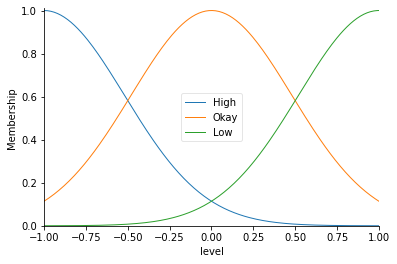

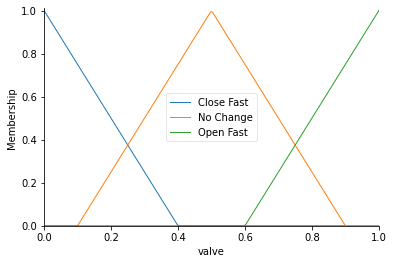

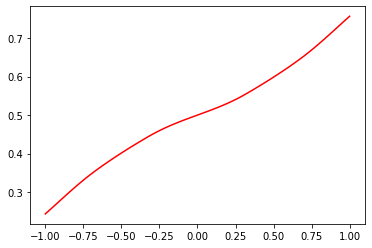

In [ ]:
#EX1: Water Level Control

import numpy as np
import skfuzzy as fuss
from skfuzzy import control as ctrl
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(-1,1,200) 
universe1 = np.linspace(0,1,200)

level = ctrl.Antecedent(universe,'level')
valve = ctrl.Consequent(universe1,'valve')


level['High'] = fuss.gaussmf(level.universe,-1,0.48)
level['Okay'] = fuss.gaussmf(level.universe,0,0.48)
level['Low']  = fuss.gaussmf(level.universe,1,0.48)
level.view()

valve['Close Fast'] = fuss.trimf(valve.universe,[0,0,0.4])
valve['No Change']  = fuss.trimf(valve.universe,[0.1,0.5,0.9])
valve['Open Fast']  = fuss.trimf(valve.universe,[0.6,1,1])
valve.view()

#Rule
rule1 = ctrl.Rule(level['Okay'], valve['No Change'])
rule2 = ctrl.Rule(level['Low'], valve['Open Fast'])
rule3 = ctrl.Rule(level['High'], valve['Close Fast'])

system = ctrl.ControlSystem(rules = [rule1,rule2,rule3])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=200*200+1)

upSampled1 = np.linspace(-1,1,61)
upSampled2 = np.linspace(0,1,61)

x = np.linspace(-1,1,61)
y = np.linspace(0,1,61)

for i in range(61):
  sim.input['level']= x[i]
  sim.compute()
  y[i]=sim.output['valve']
     
plt.figure()
plt.plot(x,y,'r',linewidth = 1.5, label='Figure Membership')

<ipython-input-33-2539f9d46687>:80: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-33-2539f9d46687>:81: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-33-2539f9d46687>:82: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


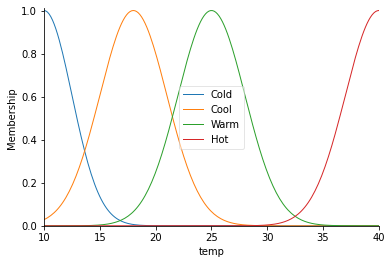

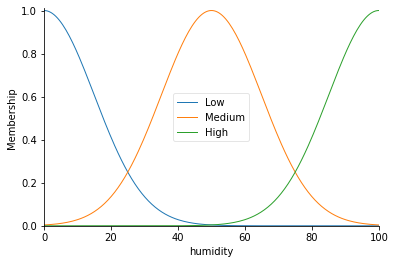

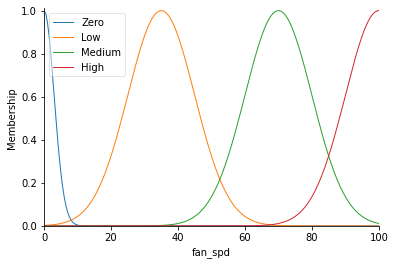

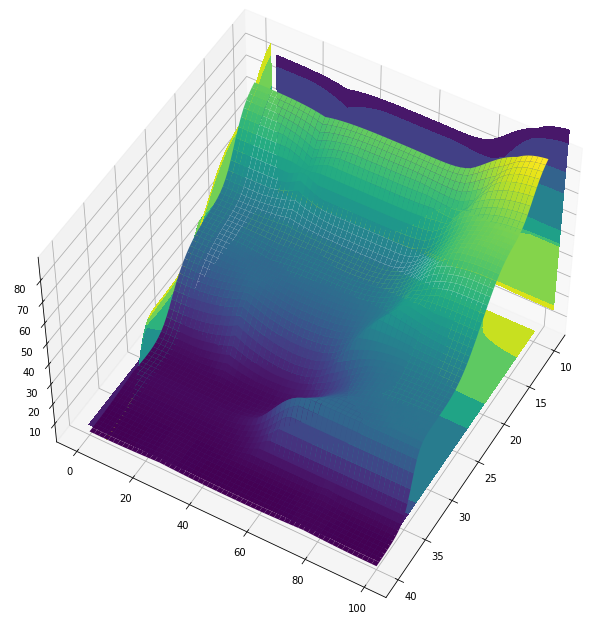

In [33]:
# EX2: Temperature Controller

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

universe = np.linspace(10,40,200) #Dải hoạt động nhiệt độ
universe1 = np.linspace(0,100,200) #Dải thang đo độ ẩm 0-100% RH
universe2 = np.linspace(0,100,200)

#Khai báo các biến vào-ra
temp = ctrl.Antecedent(universe,'temp')
humidity = ctrl.Antecedent(universe1,'humidity')
fan_spd = ctrl.Consequent(universe2,'fan_spd')

temp['Cold'] = fuzzy.gaussmf(temp.universe,10,2.5)
temp['Cool'] = fuzzy.gaussmf(temp.universe,18,3)
temp['Warm']  = fuzzy.gaussmf(temp.universe,25,3)
temp['Hot']  = fuzzy.gaussmf(temp.universe,40,3)
temp.view()


humidity['Low'] = fuzzy.gaussmf(humidity.universe,0,15)
humidity['Medium'] = fuzzy.gaussmf(humidity.universe,50,15)
humidity['High']  = fuzzy.gaussmf(humidity.universe,100,15)
humidity.view()

fan_spd['Zero'] = fuzzy.gaussmf(fan_spd.universe,0,3)
fan_spd['Low'] = fuzzy.gaussmf(fan_spd.universe,35,10)
fan_spd['Medium']  = fuzzy.gaussmf(fan_spd.universe,70,10)
fan_spd['High']  = fuzzy.gaussmf(fan_spd.universe,100,10)
fan_spd.view()

#Xây dựng luật

rule1 = ctrl.Rule(antecedent=((temp['Cold']&humidity['High']))
                              ,consequent=(fan_spd['High']))

rule2 = ctrl.Rule(antecedent=((temp['Cool']&humidity['High'])|(temp['Cold']&humidity['Medium'])|(temp['Cold']&humidity['Low']))
                              ,consequent=(fan_spd['Medium']))

rule3 = ctrl.Rule(antecedent=((temp['Warm']&humidity['High'])|(temp['Cool']&humidity['Medium'])|(temp['Cool']&humidity['Low']))
                              ,consequent=(fan_spd['Low']))

rule4 = ctrl.Rule(antecedent=((temp['Hot']&humidity['High'])|(temp['Warm']&humidity['Medium'])|(temp['Hot']&humidity['Medium'])
                              |(temp['Warm']&humidity['Low'])|(temp['Hot']&humidity['Low']))
                              ,consequent=(fan_spd['Zero']))

#Thêm Thư Viện 
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)

#Khai báo dữ liệu
upSampled1 = np.linspace(10,40,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

#Tính toán
for i in range(61):
  for j in range(61):
    sim.input['temp']= x[i,j]
    sim.input['humidity']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['fan_spd']

#Hiển Thị Kết Quả
fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',linewidth= 0.4, antialiased= True)

#Chiếu 3 hình chiếu
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,30)

<ipython-input-43-c2511b780b71>:84: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-43-c2511b780b71>:85: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-43-c2511b780b71>:86: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


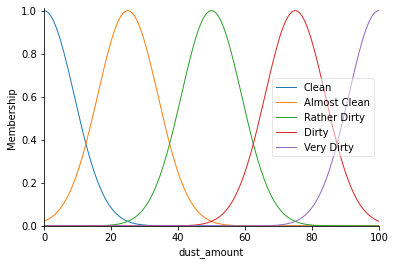

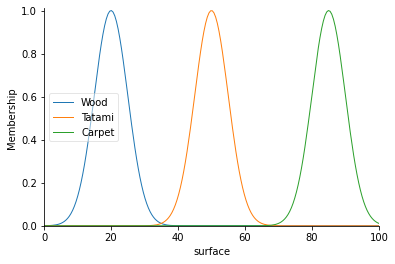

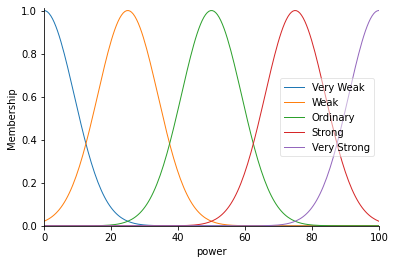

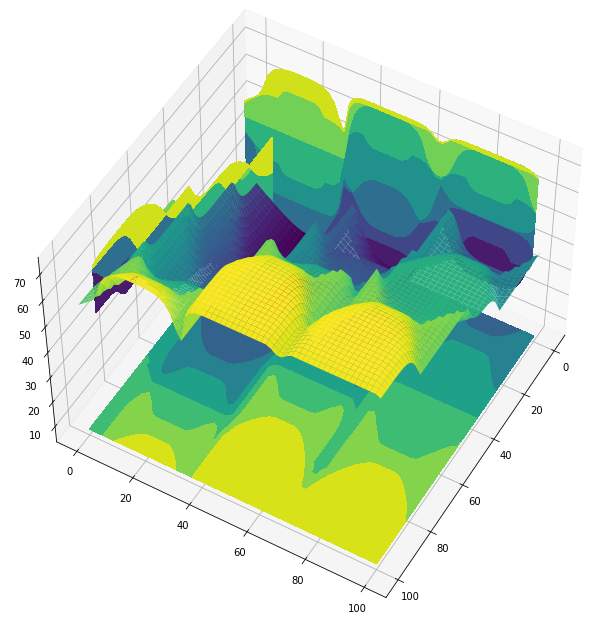

In [43]:
#Ex4: A Fuzzy Vaccum Cleaner

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

universe = np.linspace(0,100,200) 

#Khai báo các biến vào-ra
dust_amount = ctrl.Antecedent(universe,'dust_amount')
surface = ctrl.Antecedent(universe1,'surface')
power = ctrl.Consequent(universe2,'power')

dust_amount['Clean'] = fuzzy.gaussmf(dust_amount.universe,0,9)
dust_amount['Almost Clean'] = fuzzy.gaussmf(dust_amount.universe,25,9)
dust_amount['Rather Dirty']  = fuzzy.gaussmf(dust_amount.universe,50,9)
dust_amount['Dirty']  = fuzzy.gaussmf(dust_amount.universe,75,9)
dust_amount['Very Dirty']  = fuzzy.gaussmf(dust_amount.universe,100,9)
dust_amount.view()

surface['Wood'] = fuzzy.gaussmf(surface.universe,20,5)
surface['Tatami'] = fuzzy.gaussmf(surface.universe,50,5)
surface['Carpet']  = fuzzy.gaussmf(surface.universe,85,5)
surface.view()

power['Very Weak'] = fuzzy.gaussmf(power.universe,0,9)
power['Weak'] = fuzzy.gaussmf(power.universe,25,9)
power['Ordinary']  = fuzzy.gaussmf(power.universe,50,9)
power['Strong']  = fuzzy.gaussmf(power.universe,75,9)
power['Very Strong']  = fuzzy.gaussmf(power.universe,100,9)
power.view()

#Rule
rule1 = ctrl.Rule(antecedent=((dust_amount['Clean']&surface['Wood'])|(dust_amount['Almost Clean']&surface['Wood'])
                              |(dust_amount['Clean']&surface['Tatami']))
                              ,consequent=(power['Very Weak']))

rule2 = ctrl.Rule(antecedent=((dust_amount['Rather Dirty']&surface['Wood'])|(dust_amount['Almost Clean']&surface['Tatami'])
                              |(dust_amount['Clean']&surface['Carpet']))
                              ,consequent=(power['Weak']))

rule3 = ctrl.Rule(antecedent=((dust_amount['Dirty']&surface['Wood'])|(dust_amount['Rather Dirty']&surface['Tatami'])
                              |(dust_amount['Almost Clean']&surface['Carpet'])|(dust_amount['Rather Dirty']&surface['Carpet']))
                              ,consequent=(power['Ordinary']))

rule4 = ctrl.Rule(antecedent=((dust_amount['Very Dirty']&surface['Wood'])|(dust_amount['Dirty']&surface['Tatami'])
                              |(dust_amount['Dirty']&surface['Carpet']))
                              ,consequent=(power['Strong']))

rule5 = ctrl.Rule(antecedent=((dust_amount['Very Dirty']&surface['Tatami'])|(dust_amount['Very Dirty']&surface['Carpet']))
                              ,consequent=(power['Very Strong']))

#Thêm Thư Viện 
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)

#Khai báo dữ liệu
upSampled1 = np.linspace(0,100,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

#Tính toán
for i in range(61):
  for j in range(61):
    sim.input['dust_amount']= x[i,j]
    sim.input['surface']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['power']

#Hiển Thị Kết Quả
fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',linewidth= 0.4, antialiased= True)

#Chiếu 3 hình chiếu
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,30)

<ipython-input-57-3f48fff3115d>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-57-3f48fff3115d>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-57-3f48fff3115d>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


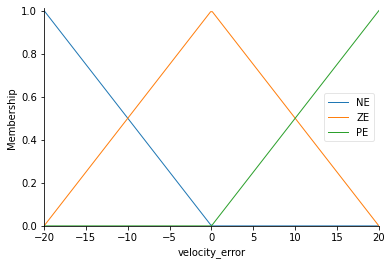

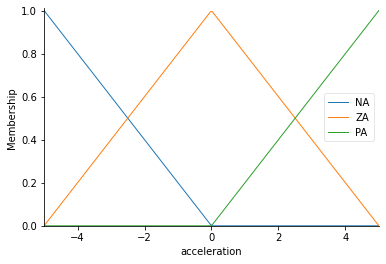

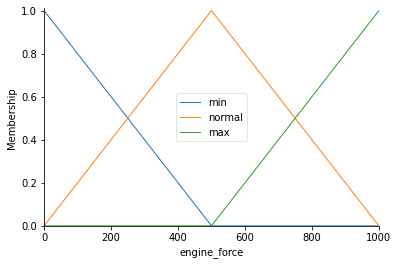

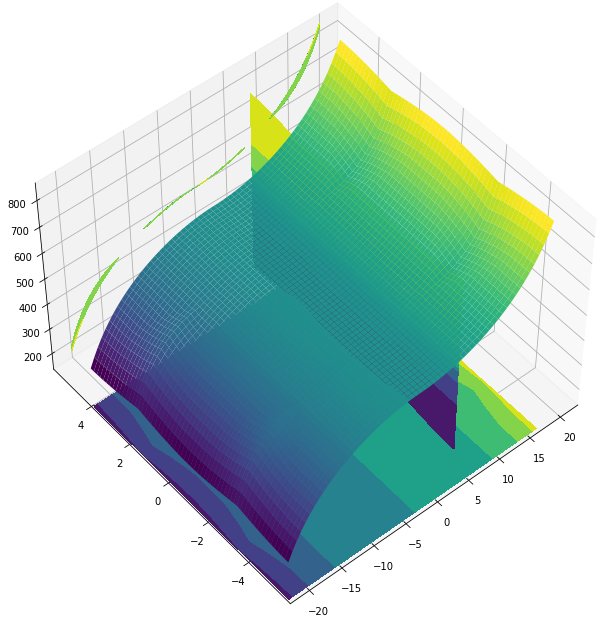

In [57]:
#EX5: Automobile cruise control
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

universe = np.linspace(-20,20,200)
universe1 = np.linspace(-5,5,200) 
universe2 = np.linspace(0,1000,2000) 

#Khai báo các biến vào-ra
velocity_error = ctrl.Antecedent(universe,'velocity_error')
acceleration = ctrl.Antecedent(universe1,'acceleration')
engine_force = ctrl.Consequent(universe2,'engine_force')


velocity_error['NE'] = fuzzy.trimf(velocity_error.universe,[-20,-20,0])
velocity_error['ZE'] = fuzzy.trimf(velocity_error.universe,[-20,0,20])
velocity_error['PE']  = fuzzy.trimf(velocity_error.universe,[0,20,20])
velocity_error.view()

acceleration['NA'] = fuzzy.trimf(acceleration.universe,[-5,-5,0])
acceleration['ZA'] = fuzzy.trimf(acceleration.universe,[-5,0,5])
acceleration['PA']  = fuzzy.trimf(acceleration.universe,[0,5,5])
acceleration.view()

engine_force['min'] = fuzzy.trimf(engine_force.universe,[0,0,500])
engine_force['normal'] = fuzzy.trimf(engine_force.universe,[0,500,1000])
engine_force['max']  = fuzzy.trimf(engine_force.universe,[500,1000,1000])
engine_force.view()

#Rule
rule1 = ctrl.Rule(antecedent=((velocity_error['NE']&acceleration['NA'])|(velocity_error['NE']&acceleration['ZA'])
                              |(velocity_error['NE']&acceleration['PA']))
                              ,consequent=(engine_force['min']))

rule2 = ctrl.Rule(antecedent=((velocity_error['ZE']&acceleration['NA'])|(velocity_error['ZE']&acceleration['ZA'])
                              |(velocity_error['ZE']&acceleration['PA']))
                              ,consequent=(engine_force['normal']))

rule3 = ctrl.Rule(antecedent=((velocity_error['PE']&acceleration['NA'])|(velocity_error['PE']&acceleration['ZA'])
                              |(velocity_error['PE']&acceleration['PA']))
                              ,consequent=(engine_force['max']))

#Thêm Thư Viện 
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)

#Khai báo dữ liệu
upSampled1 = np.linspace(-20,20,61)
upSampled2 = np.linspace(-5,5,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

#Tính toán
for i in range(61):
  for j in range(61):
    sim.input['velocity_error']= x[i,j]
    sim.input['acceleration']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['engine_force']

#Hiển Thị Kết Quả
fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',linewidth= 0.4, antialiased= True)

#Chiếu 3 hình chiếu
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,230)